## Testing of the Splotch package and data check

In [1]:
import splotch
from splotch.utils import *
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genes,_,coords,ct,ctSpot = read_array(os.getcwd() + '/examples/Count_Tables/CN93_E1_stdata_aligned_counts_IDs.txt.unified.tsv')
spots = pd.read_csv('examples/Annotations/CN93_E1.tsv',header=0,index_col=0,sep='\t') 
aar_names = list(spots.index)

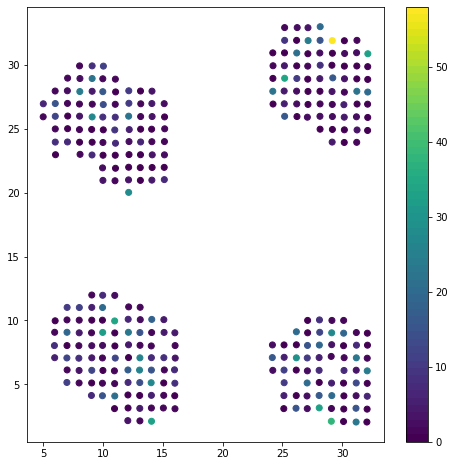

In [6]:
idx = 8842
fig, ax = plt.subplots()
fig.set_size_inches([8,8])
cmap = plt.get_cmap('viridis', ct[:,idx].max() + 1)
scatter = ax.scatter(coords[:,0], coords[:,1], c = ct[:,idx], cmap=cmap)
fig.colorbar(scatter, ticks = np.arange(ct[:,idx].max() + 1) if ct[:,idx].max() < 5 else None)
#ax.scatter([10.90], [3.09], c ="black", marker="x")
plt.show()

In [37]:
#np.savetxt("slice.csv", np.vstack((coords[:,0], coords[:,1],ct[:,idx])).T)

In [10]:
coordsLabel = np.asarray([list(map(float,spot.split('_'))) for spot in spots.columns])
spot = np.asarray([list()])
ann = np.zeros(spots.shape[1], dtype=int)
for i in range(0, len(ann)):
    if np.sum(spots.iloc[:,i]) != 0:
        ann[i] = np.where(spots.iloc[:,i] == 1)[0][0]  + 1

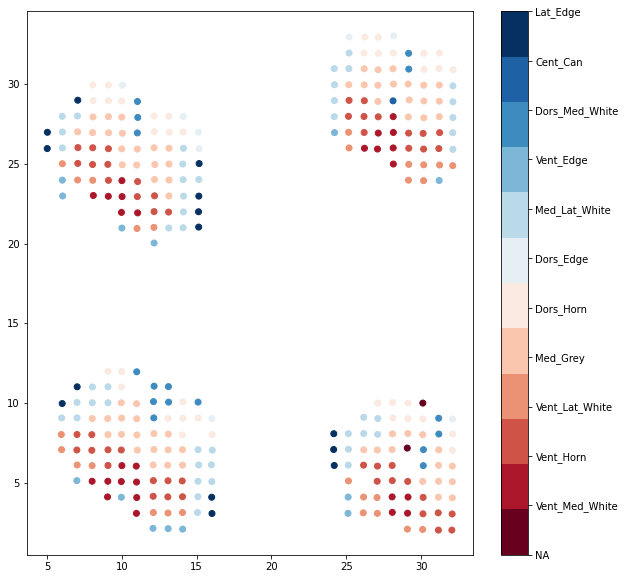

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches([10,10])
cmap = plt.get_cmap('RdBu', ann.max() + 1)
scatter = ax.scatter(coords[:,0], coords[:,1], c = ann, cmap=cmap)
cbar = fig.colorbar(scatter, ticks = np.arange(ann.max() + 1))
cbar.ax.set_yticklabels(np.hstack([['NA'],np.asarray(spots.index)])) 
plt.show()